In [2]:
my_list = [1,3,5,2,4,2,5,8,0,7,6]

In [3]:
#classical computation method 
def oracle(my_input):
    winner =7
    if my_input is winner:
        response = True 
    else:
        response = False
    return response


In [4]:
for index, trial_number in enumerate(my_list):
    if oracle(trial_number) is True:
        print("Winner is found at index %i" %index)
        print("%i calls to the oracle used " %(index +1))
        break 
    

Winner is found at index 9
10 calls to the oracle used 


In [ ]:
#quantum implemenation 
from qiskit import *
import matplotlib.pyplot as plt
import numpy as np
from qiskit.tools import job_monitor

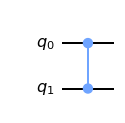

In [6]:
# oracle circuit
oracle = QuantumCircuit(2, name='oracle')
oracle.cz(0,1)
oracle.to_gate()
oracle.draw(output='mpl')

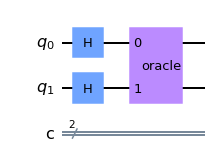

In [7]:
backend = Aer.get_backend('statevector_simulator')
grover_circuit = QuantumCircuit(2,2)
grover_circuit.h([0,1])
grover_circuit.append(oracle,[0,1])
grover_circuit.draw(output='mpl')


In [8]:
job= execute(grover_circuit, backend=backend)
result= job.result()
sv= result.get_statevector()
np.around(sv,2)


array([ 0.5+0.j,  0.5+0.j,  0.5+0.j, -0.5+0.j])

In [10]:
#amplitude amplification 
reflection = QuantumCircuit(2, name='reflection')
reflection.h([0,1])
reflection.z([0,1])
reflection.cz(0,1)
reflection.h([0,1])
reflection.to_gate()

Instruction(name='reflection', num_qubits=2, num_clbits=0, params=[])

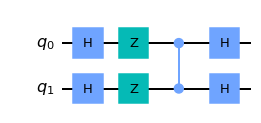

In [11]:
reflection.draw(output='mpl')

In [13]:
#testing circuit on simulator 
simulator = Aer.get_backend('qasm_simulator')
grover_circuit = QuantumCircuit(2,2)
grover_circuit.h([0,1])
grover_circuit.append(oracle,[0,1])
grover_circuit.append(reflection, [0,1])
grover_circuit.barrier()
grover_circuit.measure([0,1],[0,1])

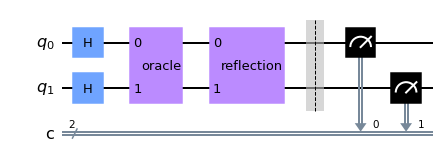

In [14]:
grover_circuit.draw(output='mpl')

In [15]:
job= execute(grover_circuit,backend=simulator,shots=1)
result=job.result()
result.get_counts()

{'11': 1}

In [17]:
#testing on real backend system 
IBMQ.load_account()
provider= IBMQ.get_provider('ibm-q')



ibmqfactory.load_account:WARNING:2022-04-08 23:43:10,927: Credentials are already in use. The existing account in the session will be replaced.


In [23]:
qcomp= provider.get_backend('ibmq_manila')
job = execute(grover_circuit,backend=qcomp)
job_monitor(job)

Job Status: job has successfully run


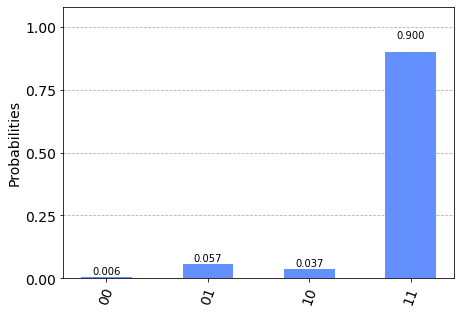

In [28]:
result=job.result()
counts=result.get_counts(grover_circuit)
from qiskit.visualization import plot_histogram
plot_histogram(counts)



In [30]:
counts['11']

3601